## This handles variability analysis for the baseline phase corresponding to section 1.1 of the discussion.

First import any necessary dependencies

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import sys
import pandas as pd
from matplotlib.ticker import MaxNLocator

# add current path to system PATH 
sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaceDataAnalysis')

# Import user defined libraries
import DataExtraction.extractRawData as dataExtractor
from BasicAnalytics import targetAcqusitionPlotting as targetPlotter
from BasicAnalytics import variabilityAnalysis 
from BasicAnalytics import plottingFuncs as pf

print(os.getcwd())
blueColor = (11/255, 201/255, 205/255)
redColor = (214/255, 50/255, 48/255)
orangeColor = (242/255, 197/255, 124/255)
poshBlackColor = (114/255, 9/255, 183/255)
from tol_colors import tol_cmap, tol_cset
cmap = tol_cset('vibrant')
import numpy as np
import matplotlib.pyplot as plt


# # Using seaborn's style
# plt.style.use('seaborn')
# width = 345

tex_fonts = {

    "text.usetex": True,
    "font.family": "serif",

    "axes.labelsize": 12,
    "font.size": 12,

    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}

plt.rcParams.update(tex_fonts)

/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaceDataAnalysis/MovementVariabilityAnalysis


Fetch the baseline data 

In [2]:
# Move to correct location
os.chdir('/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaceDataAnalysis')

# Fetch key training data for variability analysis
rigidBodyTrain1, scores, noParticipants = dataExtractor.retrieveTrainingData()

print("Finished Execution.")

Extracting trial 1 data ...


  0%|          | 0/11 [00:00<?, ?it/s]

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


100%|██████████| 11/11 [00:07<00:00,  1.57it/s]


Extracting trial 2 data ...


100%|██████████| 11/11 [00:04<00:00,  2.42it/s]


Extracting trial 3 data ...


100%|██████████| 11/11 [00:04<00:00,  2.63it/s]


Extracting trial 4 data ...


100%|██████████| 11/11 [00:05<00:00,  2.20it/s]


Extracting trial 5 data ...


100%|██████████| 11/11 [00:04<00:00,  2.63it/s]

Finished Execution.


Now plot variability of all limbs for baseline 

(57, 55)
0.005026777276387221
0.005026777276387221
(19, 11)


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12533/1973766185.py:87: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12533/1973766185.py:87: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12533/1973766185.py:87: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')
/var/folders/bd/_1l0

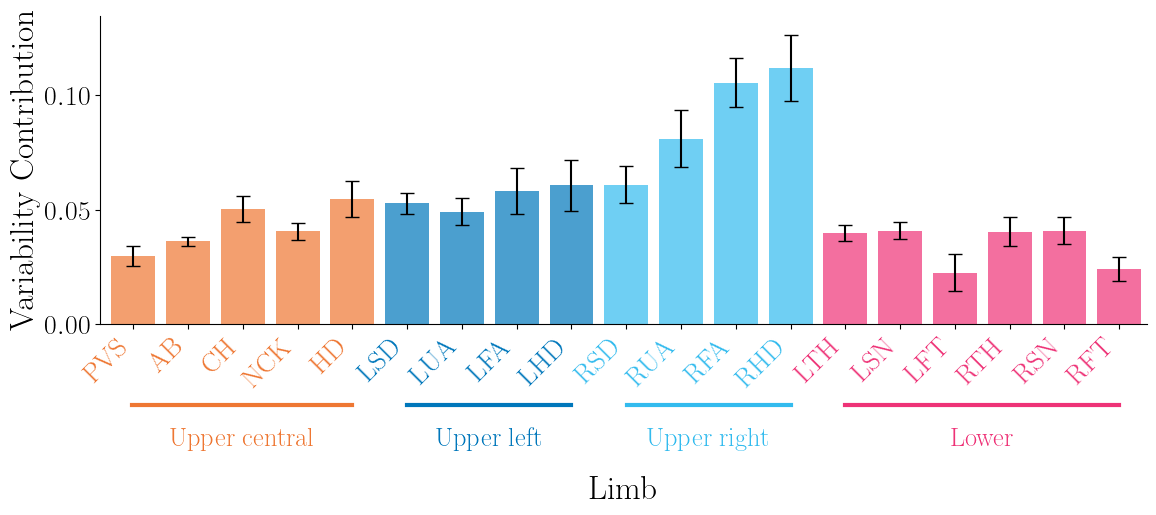

In [3]:
# Calculate variability statistic of training data
rms_values = variabilityAnalysis.calculateVariabilityScores(rigidBodyTrain1,includePositions=False,positionsOnly=False)
print(rms_values.shape)

# Calculate variability values of individual body parts by summing over dof for each body part
limbRmsValues = np.sum(rms_values.reshape(19,3,noParticipants*5),axis = 1).reshape(19,noParticipants*5)

# Average over all participants
# Check these are the same
print(limbRmsValues[0,12])
print(limbRmsValues.reshape(19,5,noParticipants)[0,1,1])
limbRmsValues = np.average(limbRmsValues.reshape(19,5,noParticipants),axis = 1)

# Normalise for each participant
for participantIdx in range(noParticipants):
    limbRmsValues[:,participantIdx] = limbRmsValues[:,participantIdx] / np.sum(limbRmsValues[:,participantIdx])

# plt.imshow(limbRmsValues)
print(limbRmsValues.shape)

# Now plot bar plot with errors bars need to check the code below

# Define necessary variables
x =  range(0, 19)

labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
    'LFA', 'LHD', 'RSD', 'RUA', 'RFA', 'RHD',  'LTH', 'LSN', 
    'LFT', 'RTH', 'RSN', 'RFT']

cmap = tol_cset('vibrant')
colors = [cmap[0],cmap[0],cmap[0],cmap[0],cmap[0],
          cmap[1],cmap[1],cmap[1],cmap[1],
          cmap[2],cmap[2],cmap[2],cmap[2],
          cmap[3],cmap[3],cmap[3],cmap[3],cmap[3],cmap[3]
]


fig = plt.figure(figsize = (13.5,4))
ax = plt.gca()
pf.createErrorBarPlot(limbRmsValues.T,xLabel = "Limb", yLabel = "Variability Contribution",
xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,offsetLabel=True,plotTopErrorOnly = False,plotSEM = False)

# Add lines to below
labelHeight = -0.035
addLines = True

# Add grouping lines
if addLines:
    labelSize = 19
    plt.axhline(y=labelHeight, xmin=0.03, xmax=0.24, color=cmap[0], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(2, labelHeight - 0.01, 'Upper central', ha='center', va='top', color=cmap[0], fontsize=labelSize, fontweight = "bold")

    plt.axhline(y=labelHeight, xmin=0.293, xmax=0.45, color=cmap[1], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(6.5, labelHeight - 0.01, 'Upper left', ha='center', va='top', color=cmap[1], fontsize=labelSize, fontweight = "bold")

    plt.axhline(y=labelHeight, xmin=0.503, xmax=0.66, color=cmap[2], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(10.5, labelHeight - 0.01, 'Upper right', ha='center', va='top', color=cmap[2], fontsize=labelSize, fontweight = "bold")

    plt.axhline(y=labelHeight, xmin=0.712, xmax=0.974, color=cmap[3], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(15.5, labelHeight - 0.01, 'Lower', ha='center', va='top', color=cmap[3], fontsize=labelSize, fontweight = "bold")

    # Set limits if necessary to make room for group labels
    plt.ylim(bottom=-0.0)  # Lower the y-limit to make space for the text
    plt.xlim(-0.6,18.5)

label = ax.xaxis.label
# Get the current position of the label, which is in axis coordinates
current_position = label.get_position()
# Set new xpos of the label
label.set_position((0.5, -0.5))

# Remove grid backgrounds
plt.grid(False)
plt.gca().set_facecolor('none')  # Set axis background to none (transparent)
plt.gcf().set_facecolor('none')  # Set figure background to none (transparent)


pf.defaultPlottingConfiguration(ax,maxYTicks=3)
plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')

(57, 55)
0.005026777276387221
0.005026777276387221
(19, 55)


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_27374/3945527692.py:88: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_27374/3945527692.py:88: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_27374/3945527692.py:88: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')


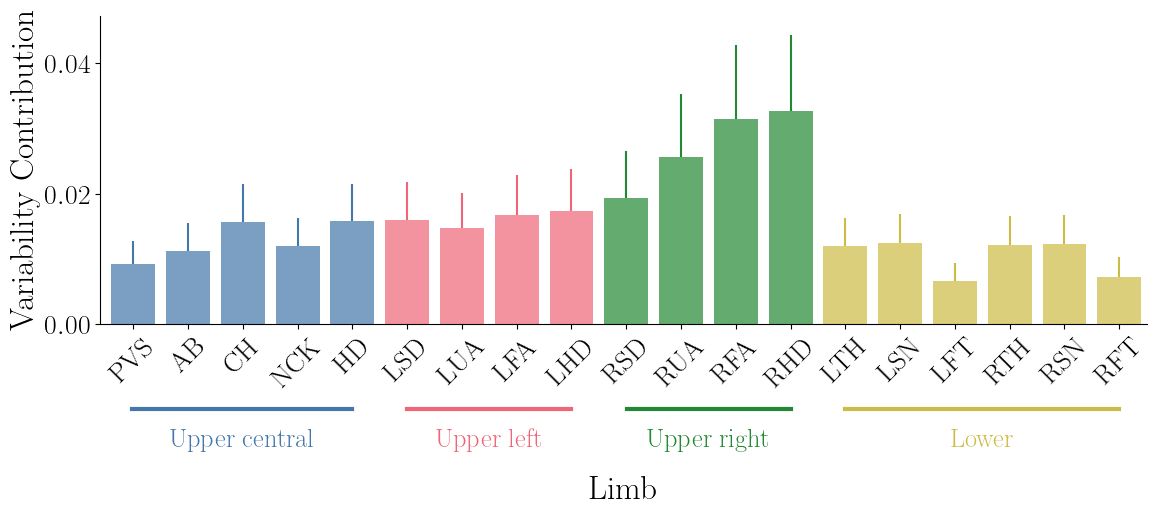

In [28]:
# Calculate variability statistic of training data
rms_values = variabilityAnalysis.calculateVariabilityScores(rigidBodyTrain1,includePositions=False,positionsOnly=False)
print(rms_values.shape)

# Calculate variability values of individual body parts by summing over dof for each body part
limbRmsValues = np.sum(rms_values.reshape(19,3,noParticipants*5),axis = 1).reshape(19,noParticipants*5)

# Average over all participants
# Check these are the same
print(limbRmsValues[0,12])
print(limbRmsValues.reshape(19,5,noParticipants)[0,1,1])
limbRmsValues = limbRmsValues.reshape(19,5,noParticipants).reshape(19,-1)

# Normalise for each participant
for participantIdx in range(noParticipants):
    limbRmsValues[:,participantIdx] = limbRmsValues[:,participantIdx] / np.sum(limbRmsValues[:,participantIdx])

# plt.imshow(limbRmsValues)
print(limbRmsValues.shape)

# Now plot bar plot with errors bars need to check the code below

# Define necessary variables
x =  range(0, 19)

labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
    'LFA', 'LHD', 'RSD', 'RUA', 'RFA', 'RHD',  'LTH', 'LSN', 
    'LFT', 'RTH', 'RSN', 'RFT']

cmap = tol_cset('bright')
colors = [cmap[0],cmap[0],cmap[0],cmap[0],cmap[0],
          cmap[1],cmap[1],cmap[1],cmap[1],
          cmap[2],cmap[2],cmap[2],cmap[2],
          cmap[3],cmap[3],cmap[3],cmap[3],cmap[3],cmap[3]
]


fig = plt.figure(figsize = (13.5,4))
ax = plt.gca()
pf.createErrorBarPlot(limbRmsValues.T,xLabel = "Limb", yLabel = "Variability Contribution",
xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,offsetLabel=True,plotTopErrorOnly = True,plotSEM = True)

# Add lines to below
labelHeight = -0.016
lineHeight = -0.013
addLines = True

# Add grouping lines
if addLines:
    labelSize = 19
    plt.axhline(y=lineHeight, xmin=0.03, xmax=0.24, color=cmap[0], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(2, labelHeight , 'Upper central', ha='center', va='top', color=cmap[0], fontsize=labelSize, fontweight = "bold")

    plt.axhline(y=lineHeight, xmin=0.293, xmax=0.45, color=cmap[1], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(6.5, labelHeight, 'Upper left', ha='center', va='top', color=cmap[1], fontsize=labelSize, fontweight = "bold")

    plt.axhline(y=lineHeight, xmin=0.503, xmax=0.66, color=cmap[2], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(10.5, labelHeight, 'Upper right', ha='center', va='top', color=cmap[2], fontsize=labelSize, fontweight = "bold")

    plt.axhline(y=lineHeight, xmin=0.712, xmax=0.974, color=cmap[3], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(15.5, labelHeight, 'Lower', ha='center', va='top', color=cmap[3], fontsize=labelSize, fontweight = "bold")

    # Set limits if necessary to make room for group labels
    plt.ylim(bottom=-0.0)  # Lower the y-limit to make space for the text
    plt.xlim(-0.6,18.5)

label = ax.xaxis.label
# Get the current position of the label, which is in axis coordinates
current_position = label.get_position()
# Set new xpos of the label
label.set_position((0.5, -0.5))

# Remove grid backgrounds
plt.grid(False)
plt.gca().set_facecolor('none')  # Set axis background to none (transparent)
plt.gcf().set_facecolor('none')  # Set figure background to none (transparent)


pf.defaultPlottingConfiguration(ax,maxYTicks=3)
plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')

(57, 55)
0.005026777276387221
0.005026777276387221
(19, 11)


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_27374/4145198006.py:87: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_27374/4145198006.py:87: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_27374/4145198006.py:87: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')


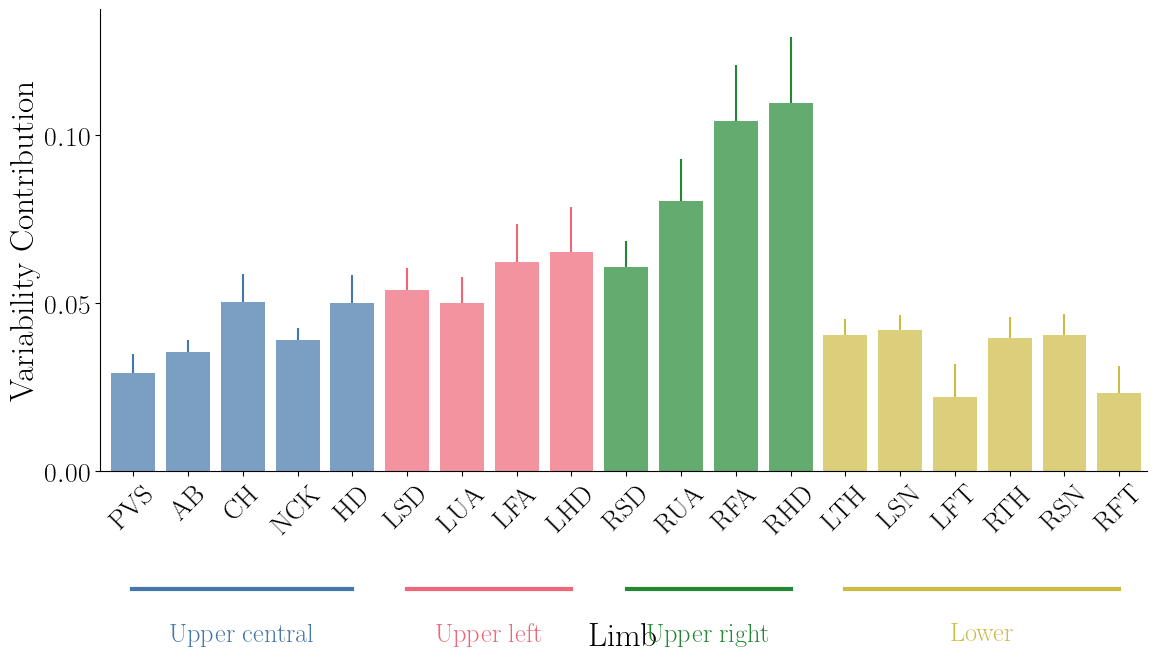

In [11]:
# Calculate variability statistic of training data
rms_values = variabilityAnalysis.calculateVariabilityScores(rigidBodyTrain1,includePositions=False,positionsOnly=False)
print(rms_values.shape)

# Calculate variability values of individual body parts by summing over dof for each body part
limbRmsValues = np.sum(rms_values.reshape(19,3,noParticipants*5),axis = 1).reshape(19,noParticipants*5)

# Average over all participants
# Check these are the same
print(limbRmsValues[0,12])
print(limbRmsValues.reshape(19,5,noParticipants)[0,1,1])
limbRmsValues = limbRmsValues.reshape(19,5,noParticipants)[:,1,:]

# Normalise for each participant
for participantIdx in range(noParticipants):
    limbRmsValues[:,participantIdx] = limbRmsValues[:,participantIdx] / np.sum(limbRmsValues[:,participantIdx])

# plt.imshow(limbRmsValues)
print(limbRmsValues.shape)

# Now plot bar plot with errors bars need to check the code below

# Define necessary variables
x =  range(0, 19)

labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
    'LFA', 'LHD', 'RSD', 'RUA', 'RFA', 'RHD',  'LTH', 'LSN', 
    'LFT', 'RTH', 'RSN', 'RFT']

cmap = tol_cset('bright')
colors = [cmap[0],cmap[0],cmap[0],cmap[0],cmap[0],
          cmap[1],cmap[1],cmap[1],cmap[1],
          cmap[2],cmap[2],cmap[2],cmap[2],
          cmap[3],cmap[3],cmap[3],cmap[3],cmap[3],cmap[3]
]


fig = plt.figure(figsize = (13.5,4))
ax = plt.gca()
pf.createErrorBarPlot(limbRmsValues.T,xLabel = "Limb", yLabel = "Variability Contribution",
xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,offsetLabel=True,plotTopErrorOnly = True,plotSEM = False)

# Add lines to below
labelHeight = -0.035
addLines = True

# Add grouping lines
if addLines:
    labelSize = 19
    plt.axhline(y=labelHeight, xmin=0.03, xmax=0.24, color=cmap[0], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(2, labelHeight - 0.01, 'Upper central', ha='center', va='top', color=cmap[0], fontsize=labelSize, fontweight = "bold")

    plt.axhline(y=labelHeight, xmin=0.293, xmax=0.45, color=cmap[1], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(6.5, labelHeight - 0.01, 'Upper left', ha='center', va='top', color=cmap[1], fontsize=labelSize, fontweight = "bold")

    plt.axhline(y=labelHeight, xmin=0.503, xmax=0.66, color=cmap[2], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(10.5, labelHeight - 0.01, 'Upper right', ha='center', va='top', color=cmap[2], fontsize=labelSize, fontweight = "bold")

    plt.axhline(y=labelHeight, xmin=0.712, xmax=0.974, color=cmap[3], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(15.5, labelHeight - 0.01, 'Lower', ha='center', va='top', color=cmap[3], fontsize=labelSize, fontweight = "bold")

    # Set limits if necessary to make room for group labels
    plt.ylim(bottom=-0.0)  # Lower the y-limit to make space for the text
    plt.xlim(-0.6,18.5)

label = ax.xaxis.label
# Get the current position of the label, which is in axis coordinates
current_position = label.get_position()
# Set new xpos of the label
label.set_position((0.5, -0.5))

# Remove grid backgrounds
plt.grid(False)
plt.gca().set_facecolor('none')  # Set axis background to none (transparent)
plt.gcf().set_facecolor('none')  # Set figure background to none (transparent)


pf.defaultPlottingConfiguration(ax,maxYTicks=3)
plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')

(57, 55)
0.005026777276387221
0.005026777276387221
(19, 11)


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12533/291839017.py:87: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12533/291839017.py:87: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12533/291839017.py:87: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')


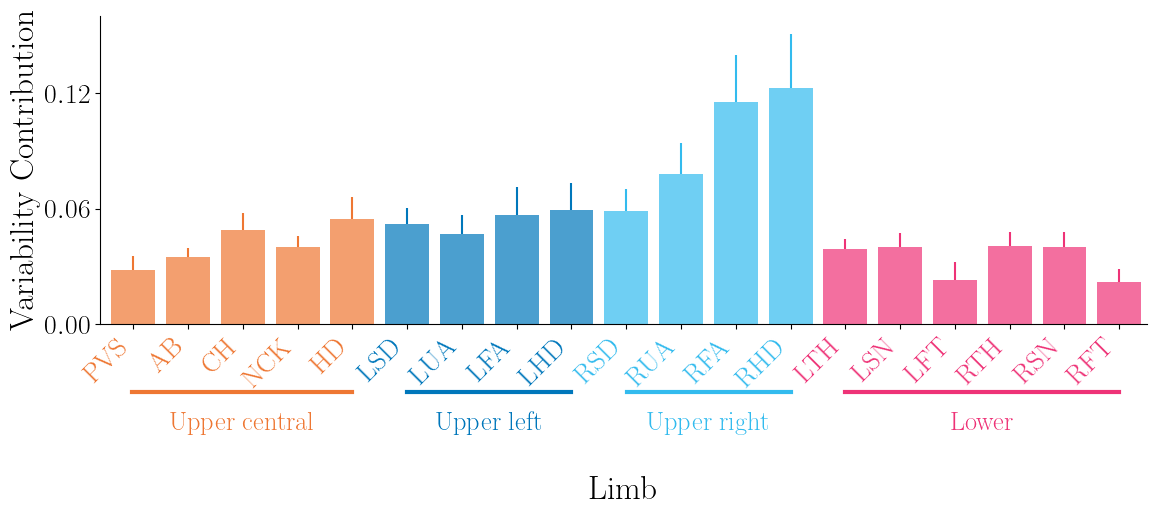

In [4]:
# Calculate variability statistic of training data
rms_values = variabilityAnalysis.calculateVariabilityScores(rigidBodyTrain1,includePositions=False,positionsOnly=False)
print(rms_values.shape)

# Calculate variability values of individual body parts by summing over dof for each body part
limbRmsValues = np.sum(rms_values.reshape(19,3,noParticipants*5),axis = 1).reshape(19,noParticipants*5)

# Average over all participants
# Check these are the same
print(limbRmsValues[0,12])
print(limbRmsValues.reshape(19,5,noParticipants)[0,1,1])
limbRmsValues = limbRmsValues.reshape(19,5,noParticipants)[:,4,:]

# Normalise for each participant
for participantIdx in range(noParticipants):
    limbRmsValues[:,participantIdx] = limbRmsValues[:,participantIdx] / np.sum(limbRmsValues[:,participantIdx])

# plt.imshow(limbRmsValues)
print(limbRmsValues.shape)

# Now plot bar plot with errors bars need to check the code below

# Define necessary variables
x =  range(0, 19)

labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
    'LFA', 'LHD', 'RSD', 'RUA', 'RFA', 'RHD',  'LTH', 'LSN', 
    'LFT', 'RTH', 'RSN', 'RFT']

cmap = tol_cset('vibrant')
colors = [cmap[0],cmap[0],cmap[0],cmap[0],cmap[0],
          cmap[1],cmap[1],cmap[1],cmap[1],
          cmap[2],cmap[2],cmap[2],cmap[2],
          cmap[3],cmap[3],cmap[3],cmap[3],cmap[3],cmap[3]
]


fig = plt.figure(figsize = (13.5,4))
ax = plt.gca()
pf.createErrorBarPlot(limbRmsValues.T,xLabel = "Limb", yLabel = "Variability Contribution",
xTicks = x, xTickLabels = labels, ax = ax, barColor = colors,offsetLabel=True,plotTopErrorOnly = True,plotSEM = False)

# Add lines to below
labelHeight = -0.035
addLines = True

# Add grouping lines
if addLines:
    labelSize = 19
    plt.axhline(y=labelHeight, xmin=0.03, xmax=0.24, color=cmap[0], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(2, labelHeight - 0.01, 'Upper central', ha='center', va='top', color=cmap[0], fontsize=labelSize, fontweight = "bold")

    plt.axhline(y=labelHeight, xmin=0.293, xmax=0.45, color=cmap[1], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(6.5, labelHeight - 0.01, 'Upper left', ha='center', va='top', color=cmap[1], fontsize=labelSize, fontweight = "bold")

    plt.axhline(y=labelHeight, xmin=0.503, xmax=0.66, color=cmap[2], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(10.5, labelHeight - 0.01, 'Upper right', ha='center', va='top', color=cmap[2], fontsize=labelSize, fontweight = "bold")

    plt.axhline(y=labelHeight, xmin=0.712, xmax=0.974, color=cmap[3], linewidth=3,clip_on = False)  # Adjust 'xmin' and 'xmax' accordingly

    # Adding a label for the group
    plt.text(15.5, labelHeight - 0.01, 'Lower', ha='center', va='top', color=cmap[3], fontsize=labelSize, fontweight = "bold")

    # Set limits if necessary to make room for group labels
    plt.ylim(bottom=-0.0)  # Lower the y-limit to make space for the text
    plt.xlim(-0.6,18.5)

label = ax.xaxis.label
# Get the current position of the label, which is in axis coordinates
current_position = label.get_position()
# Set new xpos of the label
label.set_position((0.5, -0.5))

# Remove grid backgrounds
plt.grid(False)
plt.gca().set_facecolor('none')  # Set axis background to none (transparent)
plt.gcf().set_facecolor('none')  # Set figure background to none (transparent)


pf.defaultPlottingConfiguration(ax,maxYTicks=3)
plt.savefig("1.1-VariabilityAnalysisLATEX.pdf",bbox_inches='tight')